In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('~/work/btc-without-date-copy-1.csv')
# Matrix of features
X=dataset.iloc[:, 4:5].values
# Matrix of dependent variables
y=dataset.iloc[:, 0:1].values

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X)
X = imputer.transform(X)

In [7]:
# Split the dataset into training and test sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Fitting Multiple Linear Regression to the Training set without data split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Fitting Polynomial Regression to the dataset with data split
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

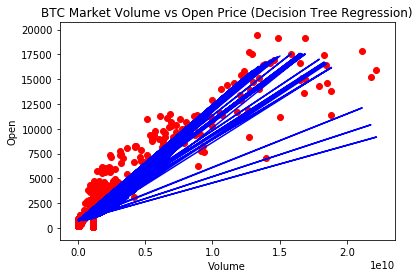

In [11]:
# Why is this one not trying to fit the data as well as the non-split polynomial regression?
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'blue')
plt.scatter(X_train, y_train, color='red')
plt.title('BTC Market Volume vs Open Price (Polynomial Regression)')
plt.xlabel('Volume')
plt.ylabel('Open')
plt.show()